# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
import random
! touch Data/simple_data.txt
f = open("Data/simple_data.txt", "w")
randomlist = [random.randint(1,30) for n in range(0,5)]
for item in randomlist: f.write("%s\n" % item)
f.close()

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
! touch Data/data.txt
g = open("Data/data.txt", "w")
np.savetxt(g, np.random.rand(5,5), fmt='%.2f')
g.close()

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [4]:
import csv
! touch Data/data.csv
with open("Data/data.txt", "r") as read_matrix, open("Data/data.csv", "w+") as out_matrix:
        reader = csv.reader(read_matrix, delimiter=',')
        dialect = csv.excel
        writer = csv.writer(out_matrix)
        writer.writerows(reader)

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [5]:
! touch Data/credit_card.txt #output file: UTF-16 LE is the encoding of notepad
with open("credit_card.dat", encoding="UTF-8") as f, open("Data/credit_card.txt", "a+", encoding="UTF-16 LE") as o:
    for line in f:
        for i in range(0, len(line), 6):
            o.write(chr(int(line[i:i+6], 2)))
o.close()

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [6]:
import json

! touch Data/user_data.csv
with open("user_data.json") as info, open("Data/user_data.csv", "w") as out:
    data = json.load(info)
    for i in range(len(data)):
        if (data[i]["CreditCardType"] == "American Express"): out.write(json.dumps(data[i])+"\n")
o.close()

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Describe what you see


In [7]:
df = pd.read_csv("https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1")

In [8]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [9]:
for col in df.columns: print(col)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faeeed9ecd0>]],
      dtype=object)

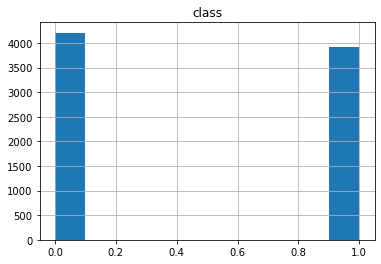

In [10]:
df.hist(column = "class")

The histograms shows how the "class" column identifies as expected the class of the object. Having to deal with mushrooms, the tag is likely to classify e.g. poisonous from edible mushrooms.

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [11]:
datafr = pd.read_csv("https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1")

In [12]:
for col in datafr.columns: print(col)

label
features_1
features_2
features_3
features_4
features_5
features_6
features_7
features_8
features_9
features_10
features_11
features_12
features_13
features_14
features_15
features_16
features_17
features_18
features_19
features_20


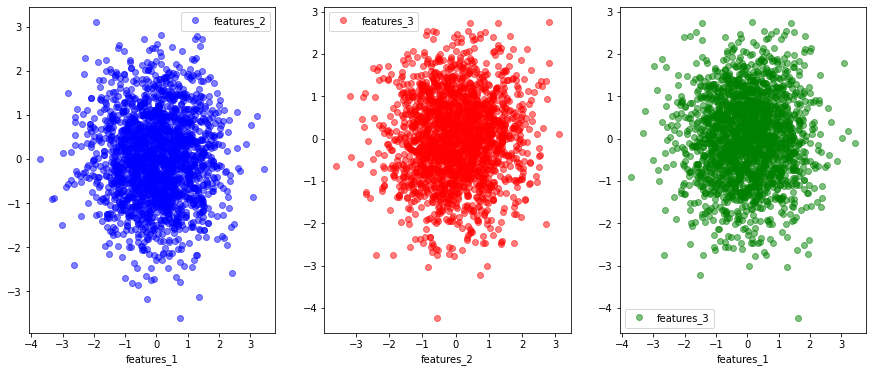

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,6))
datafr.plot(x='features_1', y='features_2', style='bo', ax=axes[0], alpha=0.5)
datafr.plot(x='features_2', y='features_3', style='ro', ax=axes[1], alpha=0.5)
datafr.plot(x='features_1', y='features_3', style='go', ax=axes[2], alpha=0.5)

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [14]:
#first run datafr = pd.read_csv(...)
datafr.to_json(r"Data/data_frame.json")